# 비지도학습 -> 군집분석 -> KMeans -> 성능 튜닝 평가

In [1]:
from hossam import load_data
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from kneed import KneeLocator

from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from scipy.spatial import ConvexHull
from sklearn.preprocessing import MinMaxScaler, StandardScaler

my_dpi = 200

In [2]:
origin = load_data("iris")
origin

1936년 영국의 통계학자 로널드 피셔(Ronald A. Fisher)가 소개한 3가지 품종(setosa, versicolor, virginica)의 붓꽃(Iris)에 대한 꽃받침과 꽃잎의 길이와 너비 측정값으로 구성된 유명한 머신러닝 및 데이터 분석용 데이터셋.(출처: Kaggle)

field         description
------------  -------------
Sepal.Length  꽃밭침 길이
Sepal.Width   꽃밭침 너비
Petal.Length  꽃잎 길이
Petal.Width   꽃잎 너비
Species       품종



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df = origin.drop("Species", axis=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
klist = list(range(2, 11))
inertia = []

for k in klist:
    estimator = KMeans(n_clusters=k, random_state=0)

    estimator.fit(X=df)

    inertia.append(estimator.inertia_)
inertia

[152.3479517603579,
 78.8556658259773,
 57.228473214285714,
 49.827740558292284,
 42.42154575309748,
 34.420191786283894,
 30.064593073593077,
 28.71585653639447,
 27.46211879129643]

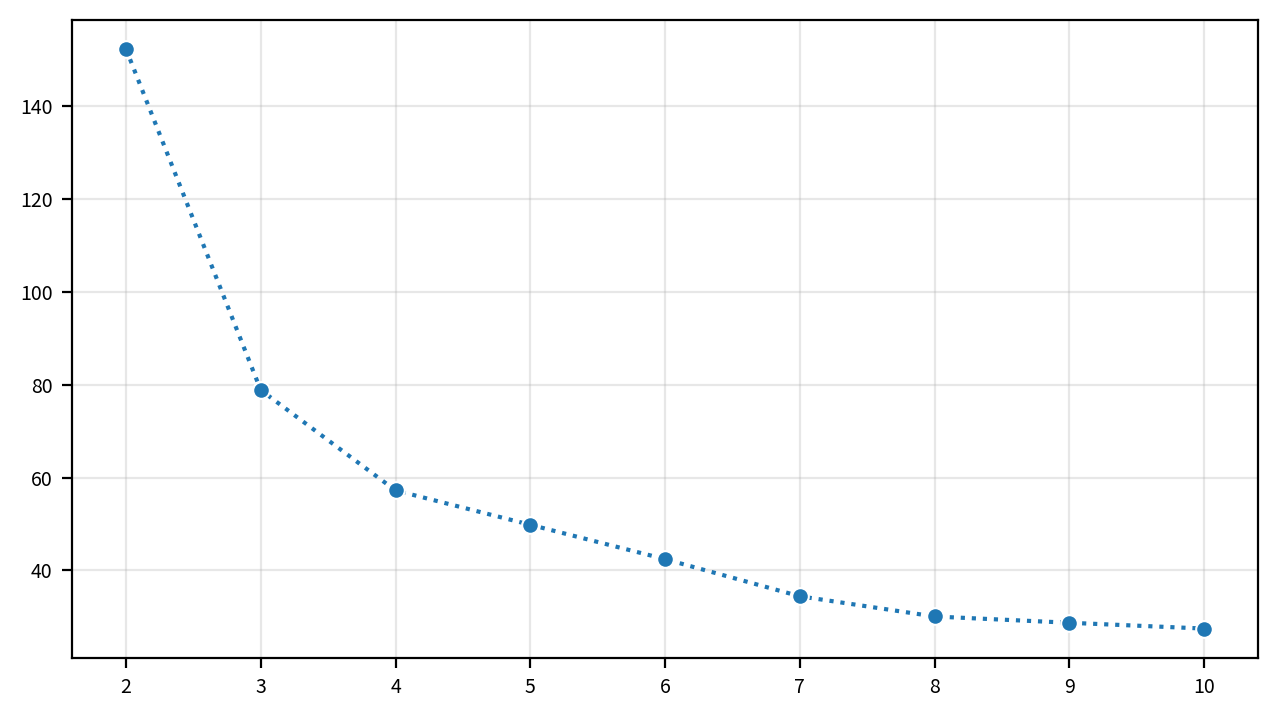

In [5]:
figsize = (1280 / my_dpi, 720 / my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(x=klist, y=inertia, linestyle=":", marker="o")

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [6]:
slope_list = [0]

for i in range(1, len(inertia)):
    x1 = klist[i - 1]
    y1 = inertia[i - 1]
    x2 = klist[i]
    y2 = inertia[i]

    slope, _ = np.polyfit([x1, x2], [y1, y2], 1)
    slope_list.append(slope)

slope_list

[0,
 np.float64(-73.49228593438046),
 np.float64(-21.627192611691576),
 np.float64(-7.400732655993445),
 np.float64(-7.406194805194826),
 np.float64(-8.001353966813573),
 np.float64(-4.355598712690819),
 np.float64(-1.3487365371986035),
 np.float64(-1.2537377450980502)]

In [7]:
avg_slope = np.mean(slope_list)
avg_slope

np.float64(-13.87620366322904)

In [8]:
ev = []
ei = []

for i, v in enumerate(slope_list):
    if v < avg_slope:
        ev.append(v)
        ei.append(i)

elbow_point = ei[np.argmax(ev)]
elbow_point

2

In [9]:
best_k = klist[elbow_point]
best_k

4

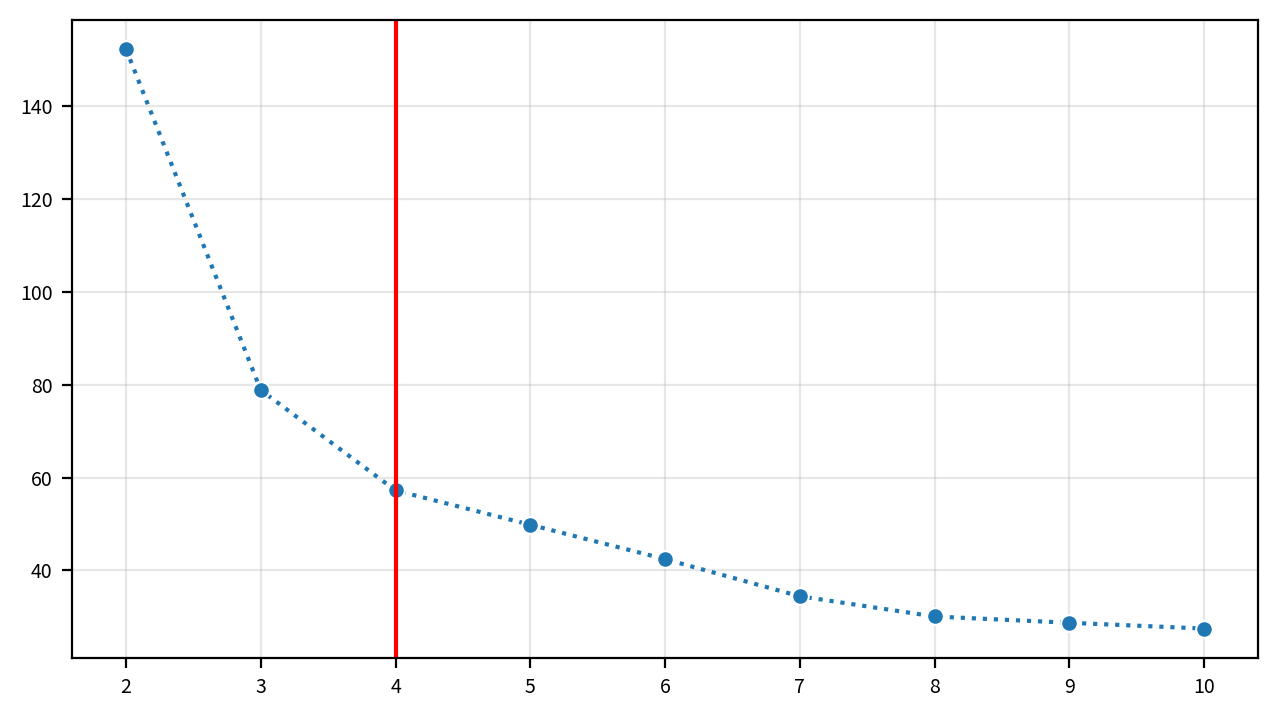

In [10]:
figsize = (1280 / my_dpi, 720 / my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.lineplot(x=klist, y=inertia, linestyle=":", marker="o")

# 3) 그래프 꾸미기
ax.axvline(x=best_k, color="red")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [11]:
from kneed import KneeLocator  # 대문자 K, 대문자 L

kl = KneeLocator(klist, inertia, curve="convex", direction="decreasing")
best_k = kl.elbow
best_y = kl.elbow_y

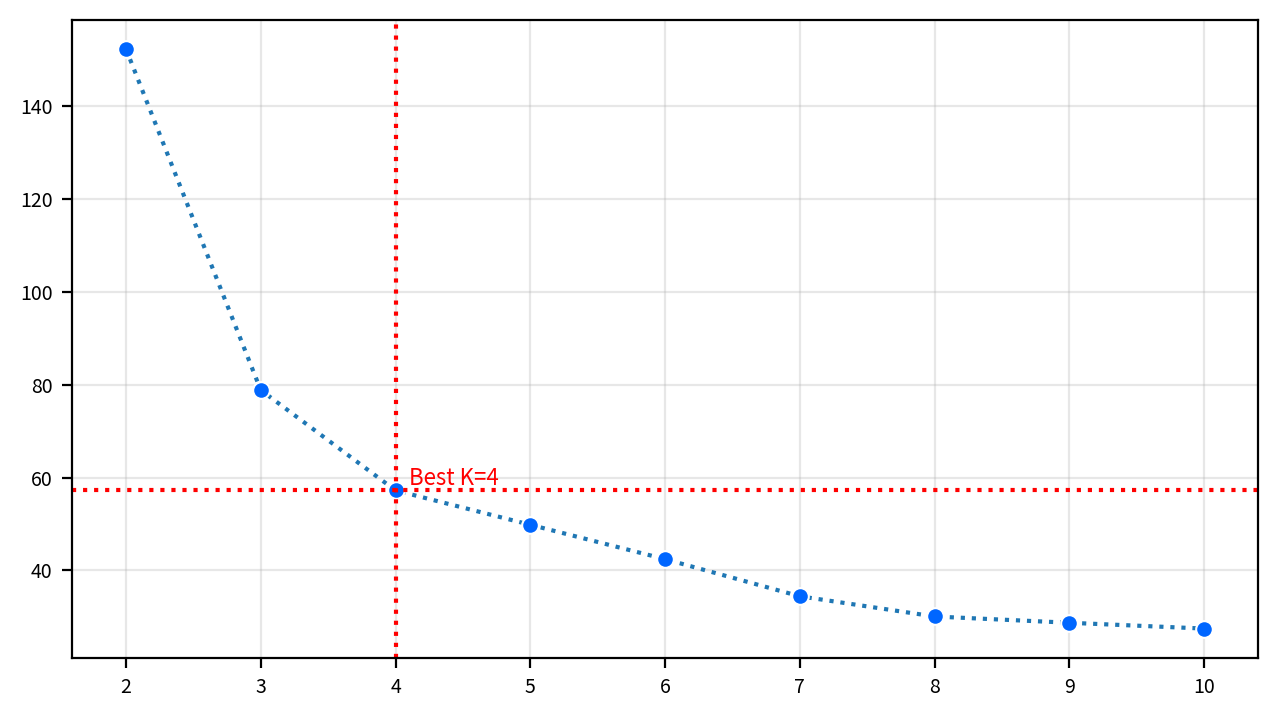

In [12]:
figsize = (1280 / my_dpi, 720 / my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi=my_dpi)

# LinePlot 그리기
sb.lineplot(
    x=klist,
    y=inertia,
    linestyle=":",
    marker="o",
    markerfacecolor="#0066ff",
    markeredgecolor="#ffffff",
)

# 엘보우 포인트 표시
ax.axvline(x=best_k, color="red", linestyle=":")
ax.axhline(y=best_y, color="red", linestyle=":")
ax.text(
    best_k + 0.1,
    inertia[elbow_point] + 0.1,
    "Best K=%d" % best_k,
    fontsize=8,
    ha="left",
    va="bottom",
    color="r",
)

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [13]:
estimator = KMeans(n_clusters=best_k)
estimator.fit(df)

cluster = estimator.predict(df)
df["ClusterID"] = cluster
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,ClusterID
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


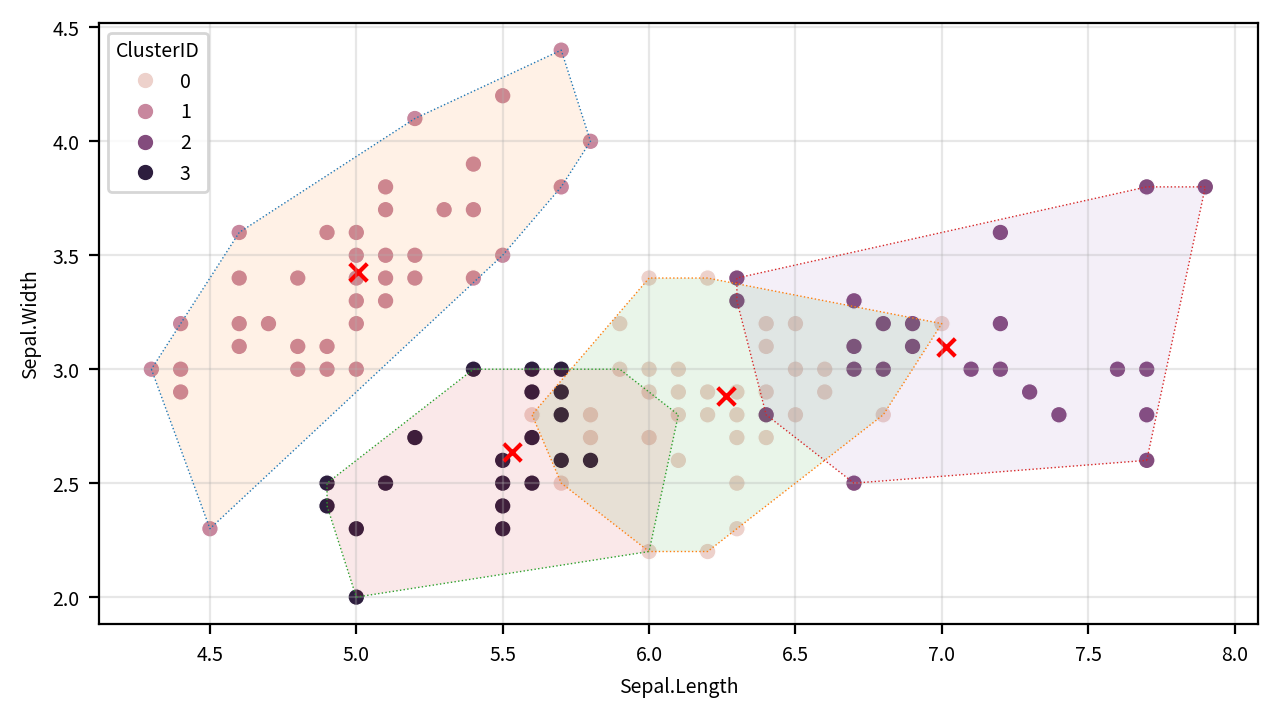

In [14]:
vdf = df.copy()
hue_field = "ClusterID"
x_field = "Sepal.Length"
y_field = "Sepal.Width"

width_px = 1280  # 그래프 가로 크기
height_px = 720  # 그래프 세로 크기
rows = 1  # 그래프 행 수
cols = 1  # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 데이터 산점도
sb.scatterplot(data=vdf, x=x_field, y=y_field, hue=hue_field)

# 군집별, 같의 종류별로 반복
for c in vdf[hue_field].unique():
    # 같의 종류별로 데이터프레임을 나눔
    df_c = vdf.loc[vdf[hue_field] == c, [x_field, y_field]]

    try:
        hull = ConvexHull(df_c)  # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])  # 시작점과 끝점을 연결
        ax.plot(
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=":"
        )
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

# 군집별 중심점 표시
ax.scatter(
    estimator.cluster_centers_[:, 0],
    estimator.cluster_centers_[:, 1],
    marker="x",
    c="red",
    alpha=1,
    s=40,
)

ax.grid(True, alpha=0.3)  # 배경 격자 표시
plt.tight_layout()  # 여백 제거
plt.show()  # 그래프 화면 출력
plt.close()  # 그래프 작업 종료